In [75]:
import requests 
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import pandas as pd 
from datetime import datetime

In [76]:
url="https://rate.bot.com.tw/xrt?Lang=zh-TW"
res=requests.get(url)
soup=bs(res.text)

In [77]:
tYpe=list()
for tr in soup.find("table",title="牌告匯率").find("tbody").find_all("tr"):
    curr=tr.find("td",class_="currency phone-small-font").find("div",class_="hidden-phone print_show").text.strip()
    tYpe.append(curr[curr.index("(")+1:-1])
    print(tr.find("td",class_="currency phone-small-font").find("div",class_="hidden-phone print_show").text.strip())
    for td in tr.find_all("td",class_="rate-content-cash text-right print_hide"):
        print(td.get("data-table"),":",td.text)

美金 (USD)
本行現金買入 : 29.74
本行現金賣出 : 30.41
港幣 (HKD)
本行現金買入 : 3.724
本行現金賣出 : 3.928
英鎊 (GBP)
本行現金買入 : 36.71
本行現金賣出 : 38.83
澳幣 (AUD)
本行現金買入 : 18.55
本行現金賣出 : 19.33
加拿大幣 (CAD)
本行現金買入 : 21.28
本行現金賣出 : 22.19
新加坡幣 (SGD)
本行現金買入 : 20.83
本行現金賣出 : 21.74
瑞士法郎 (CHF)
本行現金買入 : 31.08
本行現金賣出 : 32.28
日圓 (JPY)
本行現金買入 : 0.2753
本行現金賣出 : 0.2881
南非幣 (ZAR)
本行現金買入 : -
本行現金賣出 : -
瑞典幣 (SEK)
本行現金買入 : 2.72
本行現金賣出 : 3.24
紐元 (NZD)
本行現金買入 : 17.96
本行現金賣出 : 18.81
泰幣 (THB)
本行現金買入 : 0.8199
本行現金賣出 : 1.0099
菲國比索 (PHP)
本行現金買入 : 0.5173
本行現金賣出 : 0.6503
印尼幣 (IDR)
本行現金買入 : 0.00173
本行現金賣出 : 0.00243
歐元 (EUR)
本行現金買入 : 32.87
本行現金賣出 : 34.21
韓元 (KRW)
本行現金買入 : 0.02303
本行現金賣出 : 0.02693
越南盾 (VND)
本行現金買入 : 0.00092
本行現金賣出 : 0.00142
馬來幣 (MYR)
本行現金買入 : 5.93
本行現金賣出 : 7.555
人民幣 (CNY)
本行現金買入 : 4.209
本行現金賣出 : 4.371


In [78]:
tYpe

['USD',
 'HKD',
 'GBP',
 'AUD',
 'CAD',
 'SGD',
 'CHF',
 'JPY',
 'ZAR',
 'SEK',
 'NZD',
 'THB',
 'PHP',
 'IDR',
 'EUR',
 'KRW',
 'VND',
 'MYR',
 'CNY']

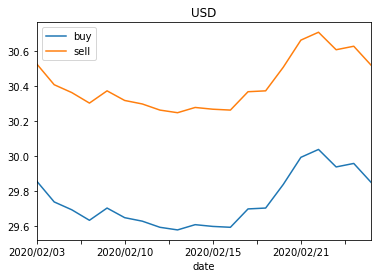

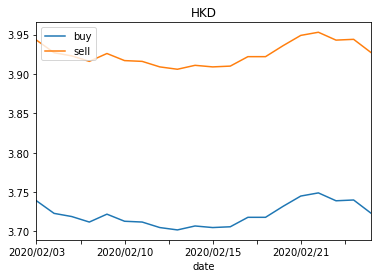

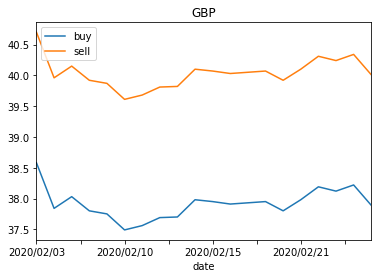

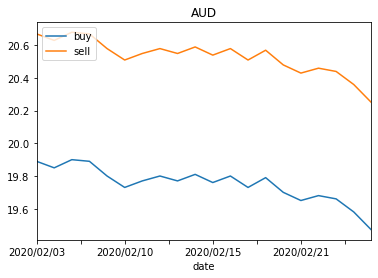

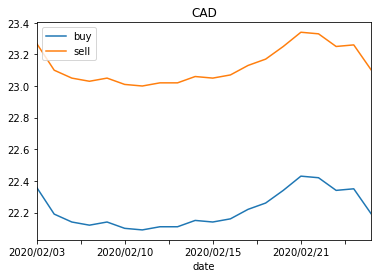

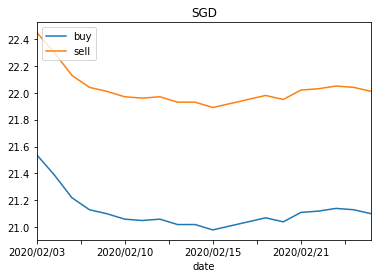

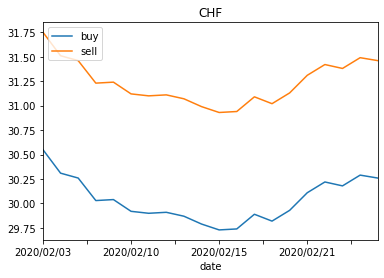

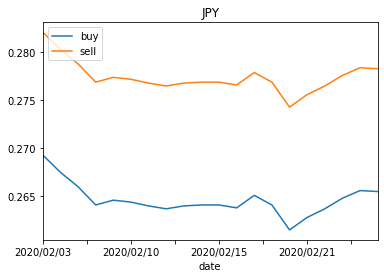

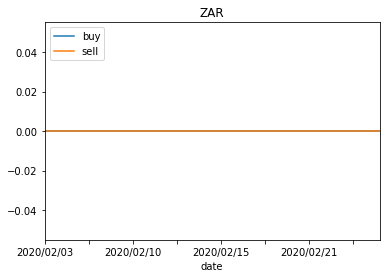

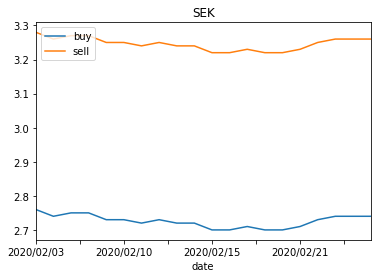

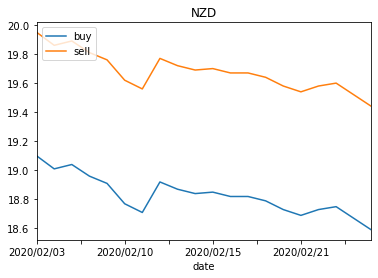

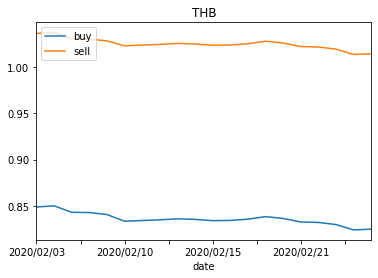

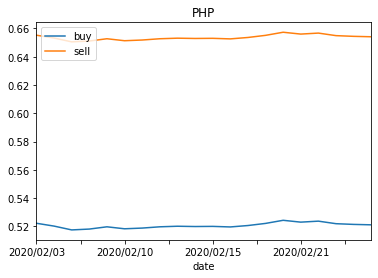

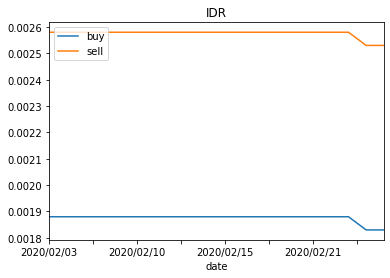

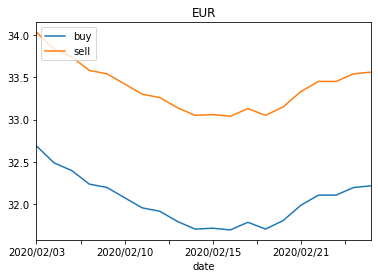

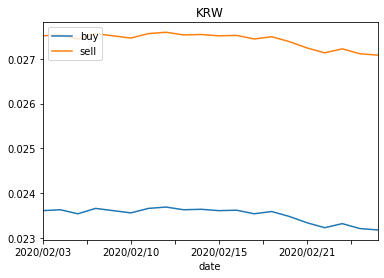

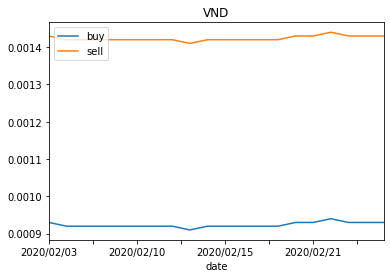

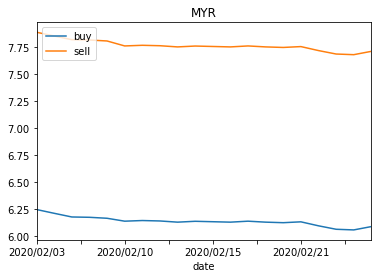

In [ ]:
url="https://rate.bot.com.tw/xrt/quote/"

for curr in tYpe:
    date=list()
    buy=list()
    sell=list()
    res=requests.get(url+"/2020-02/"+curr)
    soup=bs(res.text)
    for tr in soup.find("table",attrs={"title":"歷史本行營業時間牌告匯率"}).find("tbody").find_all("tr"):
        date.append(datetime.strptime(tr.find("a").text,"%Y/%M/%d").strftime("%Y/%M/%d"))
        buy.append(float(tr.find_all("td",class_="rate-content-cash text-right print_table-cell")[0].text))
        sell.append(float(tr.find_all("td",class_="rate-content-cash text-right print_table-cell")[1].text))
    his=pd.DataFrame({"date":date,
                     "buy":buy,
                     "sell":sell}).set_index("date").sort_index()
    #print(his)
    his[["buy","sell"]].plot(title=curr)
    plt.legend(loc="upper left")
    plt.show()
    
